<a href="https://colab.research.google.com/github/junghyeon0114/hands_on/blob/main/CH04_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

핸즈온 4장 모델 훈련 p.157-202 필사

# CH04 모델 훈련

**4.1 선형회귀**

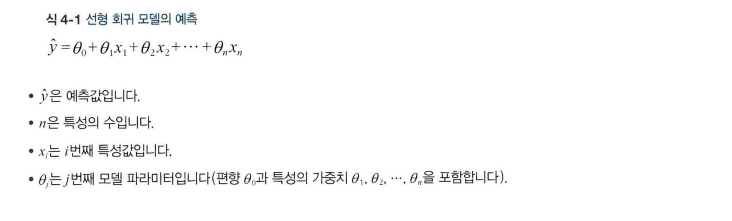

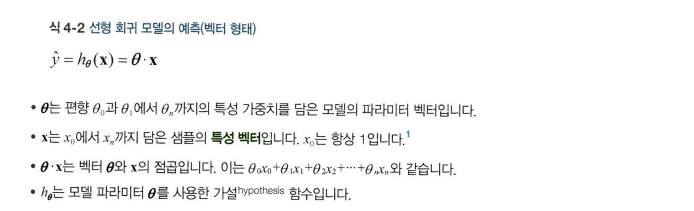

모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것.

모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정.

- 4.1.1 정규방정식

비용함수를 최소화하는 세타값을 찾기 위한 해석적인 방법이 있음.

정규방정식.

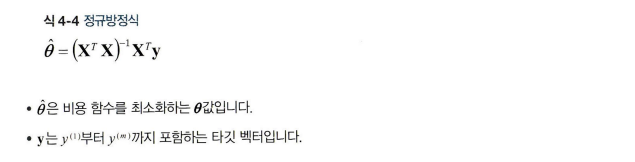

In [ ]:
#선형처럼 보이는 데이터 생성

import numpy as np

X= 2 * np.random.rand(100,1)
y = 4 + 3 *X + np.random.randn(100,1)

In [ ]:
#정규방정식을 이용해 세타 햇 값 계산

X_b = np.c_[np.ones((100, 1)), X]       # 모든 샘플에 x0=1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)    # np.linalg.inv : 역행렬 계산. #dot() : 행렬 곱셈

theta_best

array([[4.21724337],
       [2.73836017]])

image.png

In [ ]:
# 세타 햇 사용해 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0=1 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21724337],
       [9.6939637 ]])

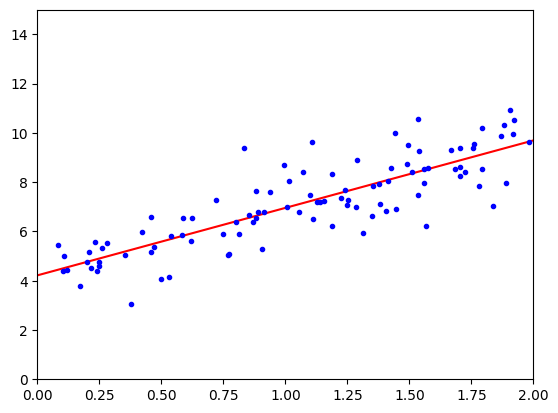

In [ ]:
#모델 예측 그림
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-", label="예측")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
# 선형 회귀 수행
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.21724337] [[2.73836017]]
[[4.21724337]
 [9.6939637 ]]


In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21724337],
       [2.73836017]])

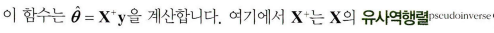

In [ ]:
# np.linalg.pinv( ) : 유사역행렬 구하기
np.linalg.pinv(X_b).dot(y)

array([[4.21724337],
       [2.73836017]])

**4.1.2 계산복잡도**

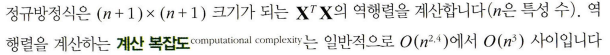

**4.2 경사 하강법**



여러 종류의 문제에서 최적의 해법을 찾을 수 있는일반적인 최적화 알고리즘. 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것.

그레디언트가 감소하는 방향 (0이 되면 최솟값 도달)

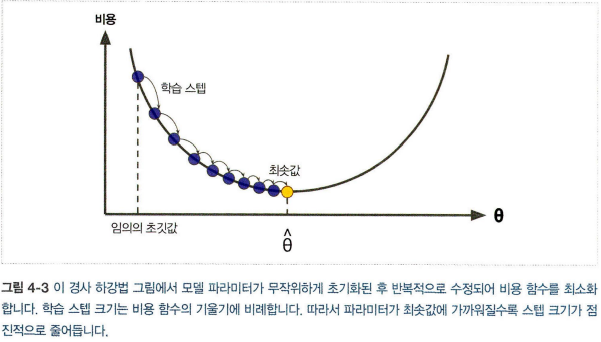

**4.2.1 배치 경사 하강법**

경사 하강법을 구현하려면 각 모델 파라미터 image.png 에 대해 비용 함수의 그레이디언트를 계한해야 함.

즉 , image.png 가 조금 변경될 때 비용함수가 얼마나 바뀌는지 계산해야 함.

이를 편도함수라고 한다.

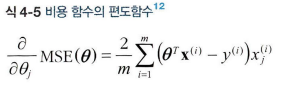

편도 함수를 각각 계산하는 대신 아래와 같이 한꺼번에 계산 가능

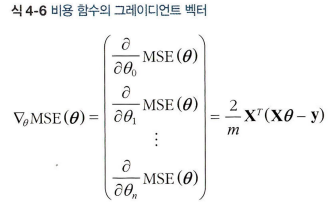

위로 향하는 그레이디언트 벡터가 구해지면 반대 방향인 아래로 가야 함. 세타에서 image.png


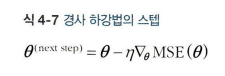

In [ ]:
# 알고리즘 구현
eta = 0.1                      # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # 무작위 초기화

for interation in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[4.21724337],
       [2.73836017]])

정규방정식 값과 일치. 경사 하강법이 완벽함을 알 수 있음

- 아래 그림은 세 가지 다른 학습률을 사용하여 진행한 경사 하강법의 스텝 처음 10개

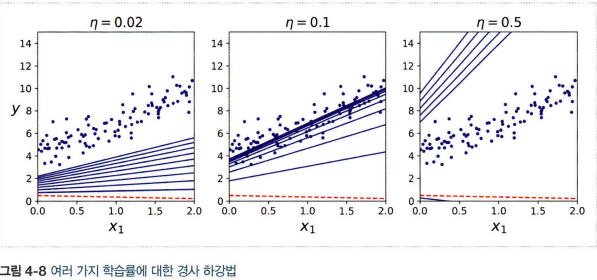

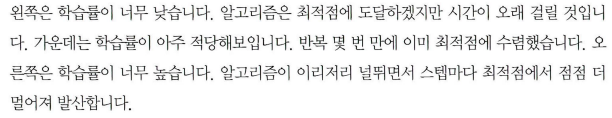

**4.2.2 확률적 경사 하강법**

- 배치 경사 하강법의 가장 큰 문제 : 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산한다는 것. -> 훈련 세트가 커지면 매우 느려짐

- 확률적 경사 하강법 : 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산.

매 반복에서 다뤄야 하는 데이터가 매우 적어 알고리즘이 훨씬 빠름.

하지만 배치 경사에 비해 훨씬 불안정.


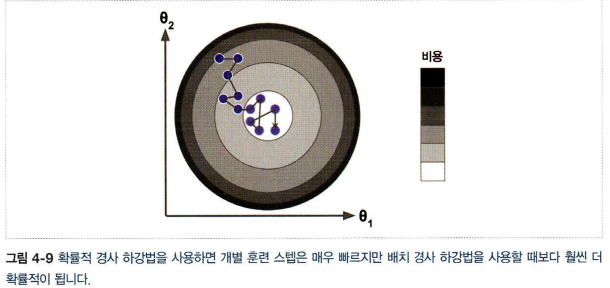

In [ ]:
# 간단한 학습 스케줄을 사용한 확률적 경사 하강법의 구현
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)  # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
     random_index = np.random.randint(m)
     xi = X_b[random_index: random_index+1]
     yi = y[random_index: random_index+1]
     gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
     eta = learning_schedule(epoch * m + i)
     theta = theta - eta * gradients

In [ ]:
theta

array([[4.21704376],
       [2.74478364]])

일반적으로 한 반복에서 m번 되풀이 : 각 반복을 에포크라고 함.

사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스 사용.

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

정규방정식과 유사한 결과  

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.22988275]), array([2.8023372]))

**4.2.3 미니배치 경사 하강법**

각 스텝에서 전체 훈련 세트(배치 경사 하강법처럼)나 하나의 샘플(확률적 경사 하강법에서 처럼)을 기반으로 그레이디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대한 그레이디언트를 계산함.

**4.3 다항 회귀**

각 특성의 거듭제곱을 새로운 특성으로 추가하고 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것.



In [ ]:
# 간단한 2차방정식으로 비선형 데이터 생성(약간잡음포함)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

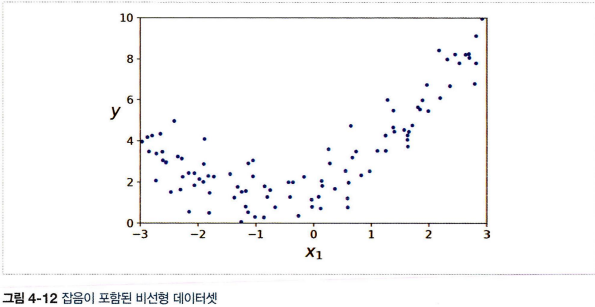

In [ ]:
# 사이킷런의 PolynomialFeatures 를 사용해 훈련 데이터를 변환

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.3555746])

In [ ]:
X_poly[0]

array([1.3555746 , 1.83758251])

In [ ]:
# 확장된 훈련 데이터(X_poly)에 Linear Regression 을 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.89129015]), array([[0.92148131, 0.51036307]]))

- 실제 원래 함수 : image.png

- 예측된 모델 : image.png

**4.4 학습 곡선**

고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것임.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation set")
  plt.legend(loc="upper right", fontsize=14)
  plt.xlabel("Train Set Size", fontsize=14)
  plt.ylabel("RMSE", fontsize=14)

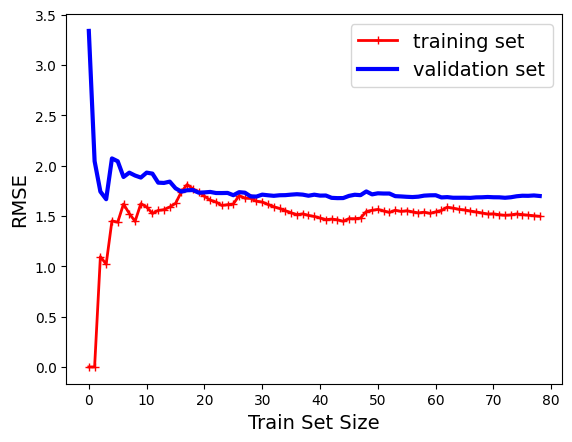

In [ ]:
# 단순 선형 회귀 모델의 학습 곡선

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

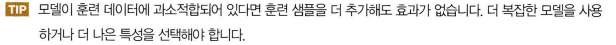

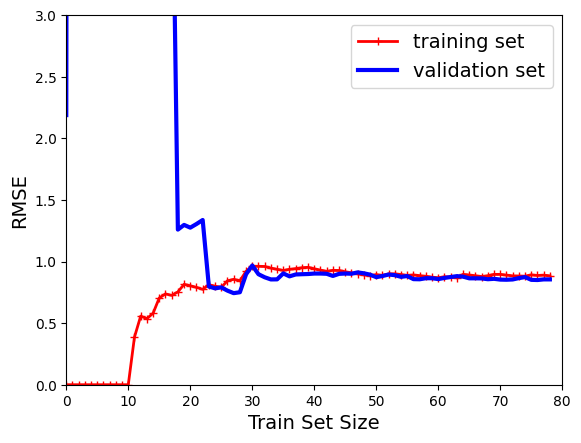

In [ ]:
# 10차 다항 회귀 모델의 학습 곡선

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()), ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

이 학습 곡선은 이전과 비슷해 보이지만 두가지 매우 중요한 차이점

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
- 두 곡선 사이에 공간이 있음. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고 이는 과대 적합 모델의 특징. 하지만 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워 짐.


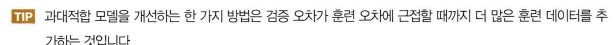

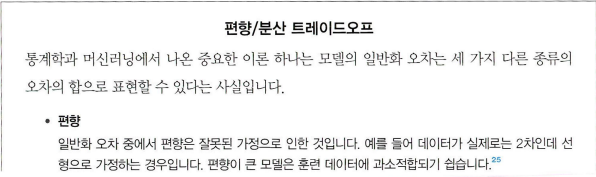
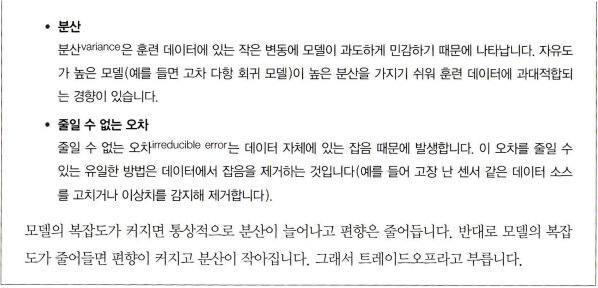

**4.5 규제가 있는 선형 모델**

과대적합을 감소시키는 좋은 방법은 모델을 규제하는것.

선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가함.
: 릿지, 라쏘, 엘라스틱넷

**4.5.1 릿지 회귀**

릿지 회귀는 규제가 추가된 선형 회귀 버전.

규제항이 비용 함수에 추가됨. 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 델의 가중치가 가능한 한 작게 유지되도록 노력함. 규제항은 훈련하는 동안에만 비용 함수에 추가됨. 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가함.

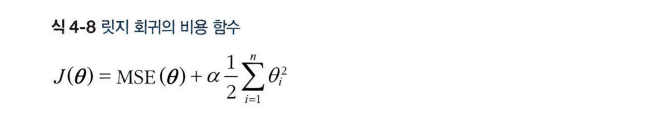

하이퍼파라미터 알파는 모델을 얼마나 많이 규제할지 조절.

알파=0 이면 릿지 회귀는 선형 회귀와 같아짐.

알파가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨.

알파가 커지면 직선이 됨.

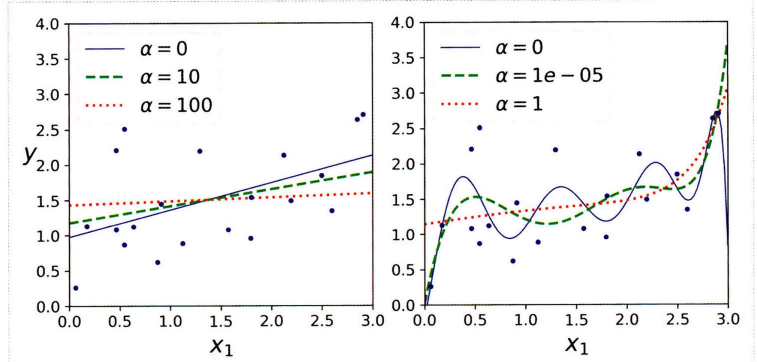

In [ ]:
# 사이킷런에서 정규방정식을 사용한 릿지 회귀 적용

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.77600723]])

In [ ]:
# 확률적 경사하강법 사용

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.74445268])

penalty 매개변수는 사용할 규제를 지정.

"l2"는 SGD가 비용 함수에 가중치 벡터의 l2, 노름의 제곱을 2로 나눈 규제항을 추가하가ㅔ 만듦. 즉, 릿지 회귀와 같음


**4.5.2 라쏘 회귀**

선형 회귀의 또 다른 규제된 버전

릿지회귀처럼 비용 함수에 규제항을 더하지만, l2 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 l1 노르믈 사용

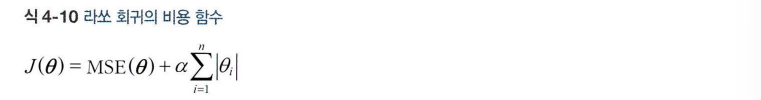

라쏘 회귀는 덜 중요한 특성의 가중치를 제거하려고 한다는 점.



첫째 파라미터가 전역 최적에 가까워질수록 그레이디언트가 작아짐.

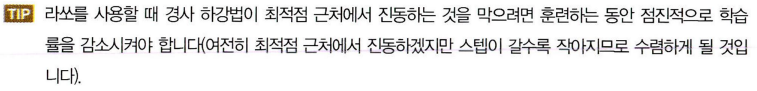

In [ ]:
# Lasso 클래스를 사용한 간단한 사이킷런 예제

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)  # Lasso 대신 SGDRegrssor(penalty='l1')을 사용할 수도 있음
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.73115944])

**엘라스틱넷**

릿지회귀와 라쏘 회귀를 절충한 모델.

규제항은 릿지와 휘귀의 규제항을 단순히 더해서 사용하며 혼합정도는 혼합 비율 r을 사용해 조절. r=0이면 엘라스틱넷은 릿지회귀와 같고 r=1이면 라쏘회귀와 같음

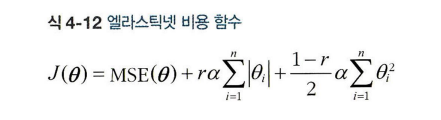

In [ ]:
# 사이킷런의 ElasticNet을 사용한 간단한 예제

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.73348776])

**4.5.4 조기 종료**

조기 종료 : 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 아주 색다른 방식은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것.

감소하던 검증 에러가 멈추었다가 다시 상
= 모델이 훈련데이터에 과대적합되기 시작함

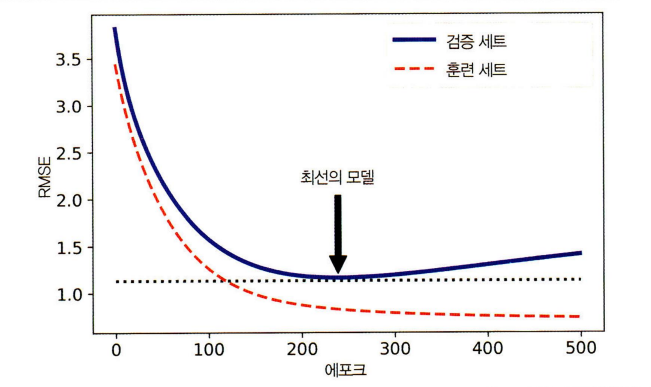

In [ ]:
# 조기 종료를 위한 기본적인 구현 코드

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore')

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias = False)),
    ("std_scaler", StandardScaler())
])
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start=True: fit() 메소드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어감
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)   # 훈련을 이어서 진행합니다.
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

**4.6 로지스틱 회귀**

샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용됨.

**4.6.1 확률 추정**

로지스틱 회귀는 선형 회귀 모델과 같이 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산. 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력


**4.6.2 훈련과 비용 함수**

훈련의 목적은 양성 샘플 (y=1)에 대해서 높은 확률을 추정하고, 음성 샘플 (y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 세타를 찾는 것.

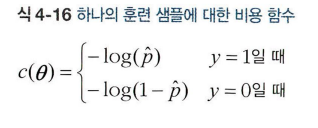

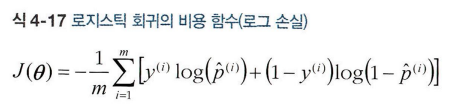

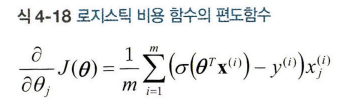

**4.6.3 결정 경계**

In [ ]:
# iris_data 사용

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris['data'][:,3:]                  # 꽃잎의 너비
y = (iris['target']==2).astype(np.int)  # Iris-Virginica면 1, 그렇지 않으면 0

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

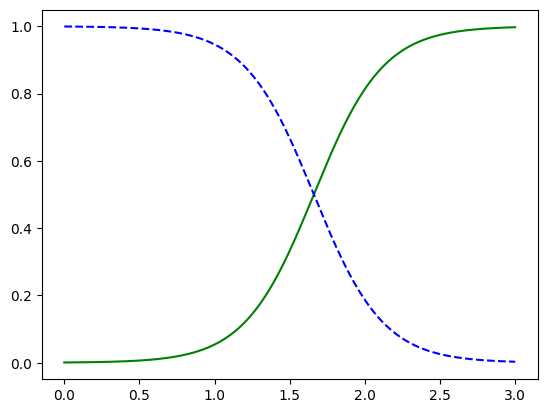

In [ ]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산
X_new = np.linspace(0,  3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]


plt.plot(X_new, y_proba[:, 1], "g-",label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--",label="Not Iris virginica")

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

**4.6.4 소프트맥스 회귀**

로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있음.

이를 소프트맥스 회귀 또는 다항 로지스틱 회귀라고 함.


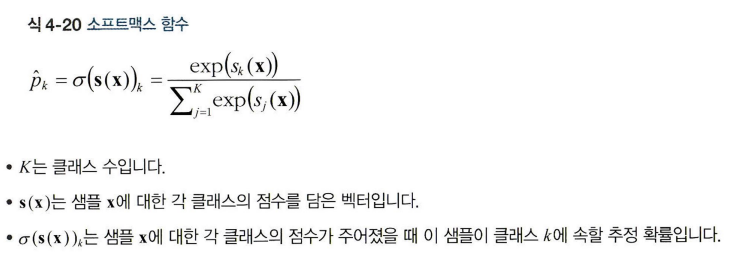

로지스틱 회귀 분류기와 마찬가지로 소프트맥스 회귀 분류기는 추정 확률이 가장 높은 클래스를 선택

- 사이킷런의 Logistic Regression은 클래스가 둘 이상일 때 기본적으로 일대다 전략을 사용

하지만 multi_class 매개 변수를 "multinomial"로 바꾸면 소프트맥스 회귀 사용 가능.

소프트맥스 회귀 사용하려면 solver 매개 변수에 "lbfgs"와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 함.

In [ ]:
X = iris['data'][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃을 발견했다고 가정하고 이 붓꽃의 품종이 무엇인지 모델에 질의하면 94.2%의 확률로 Iris-Virginica(클래스2)라고 (또는 5.8%의 확률로 Iris-Versicolor라고 출력할 것)